# **Titanic Project**

# **1. Import Required Libraries**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **2. Load and Clean the Data**

In [18]:
# Load dataset
train_df = pd.read_csv("train.csv")

# Copy data to avoid chained assignment issues
train_df = train_df.copy()

# Handle missing values
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].median())
train_df["Embarked"] = train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])
train_df.drop(columns=["Cabin"], inplace=True)  # Drop 'Cabin' due to excessive missing values

# Check for remaining missing values
print("Missing Values:\n", train_df.isnull().sum())


Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# **3. Detect & Handle Outliers using IQR Method**

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from 'Fare' and 'Age'
train_df = remove_outliers(train_df, "Fare")
train_df = remove_outliers(train_df, "Age")


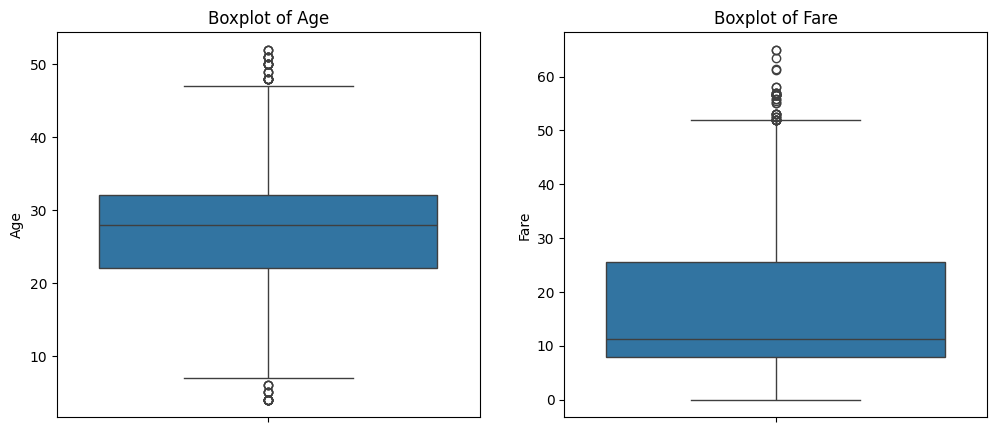

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Detect outliers using boxplots for numeric features
numeric_cols = ["Age", "Fare"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=train_df[col])
    plt.title(f"Boxplot of {col}")

plt.show()

# **4. Data Visualization (Bar Charts, Histograms, and Correlation Heatmap)**

# 4.1 📊 Bar Charts for Categorical Variables

<ipython-input-20-37daa4ce3438>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df[col], palette="viridis")
<ipython-input-20-37daa4ce3438>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df[col], palette="viridis")
<ipython-input-20-37daa4ce3438>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df[col], palette="viridis")
<ipython-input-20-37daa4ce3438>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=F

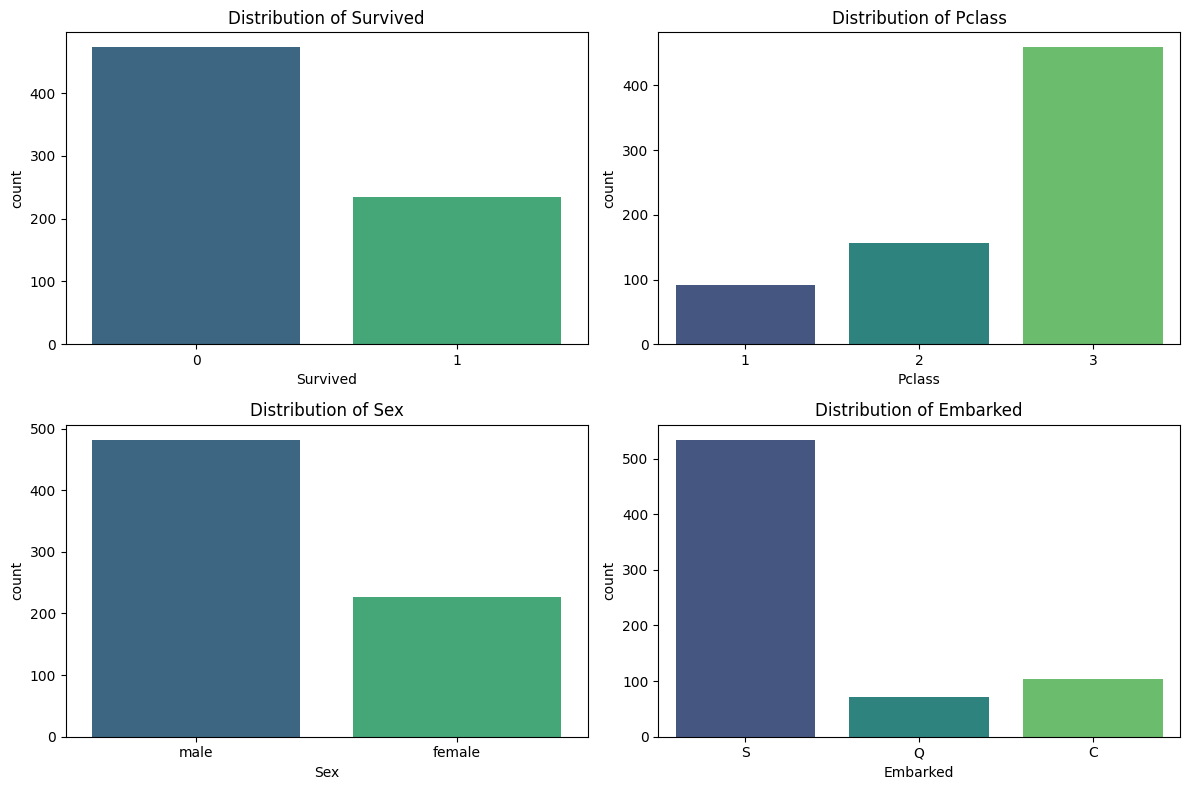

In [20]:
categorical_cols = ["Survived", "Pclass", "Sex", "Embarked"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=train_df[col], palette="viridis")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


# 4.2 📈 Histograms for Numeric Distributions

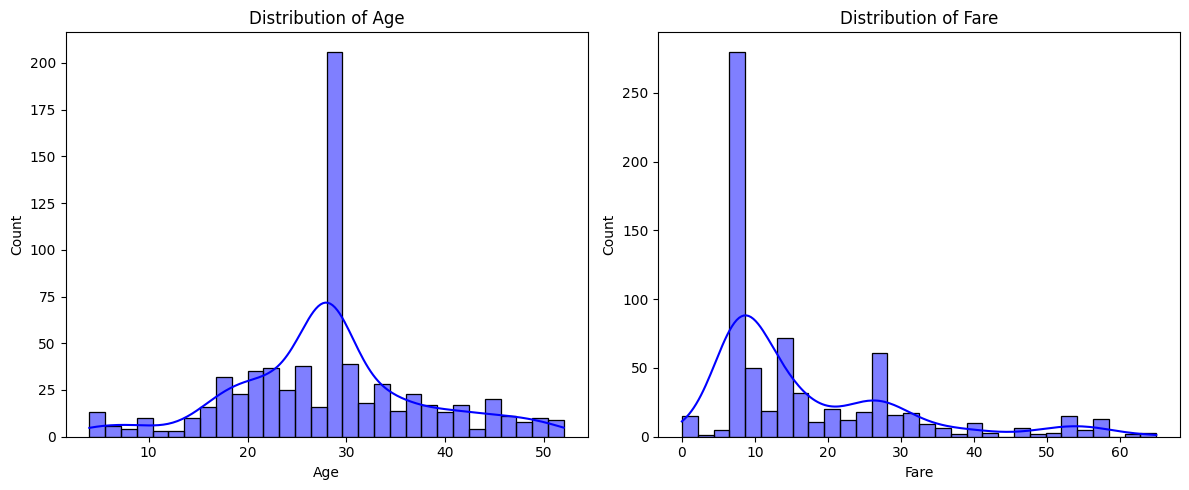

In [21]:
numeric_cols = ["Age", "Fare"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(train_df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


# 4.3 Correlation Heatmap

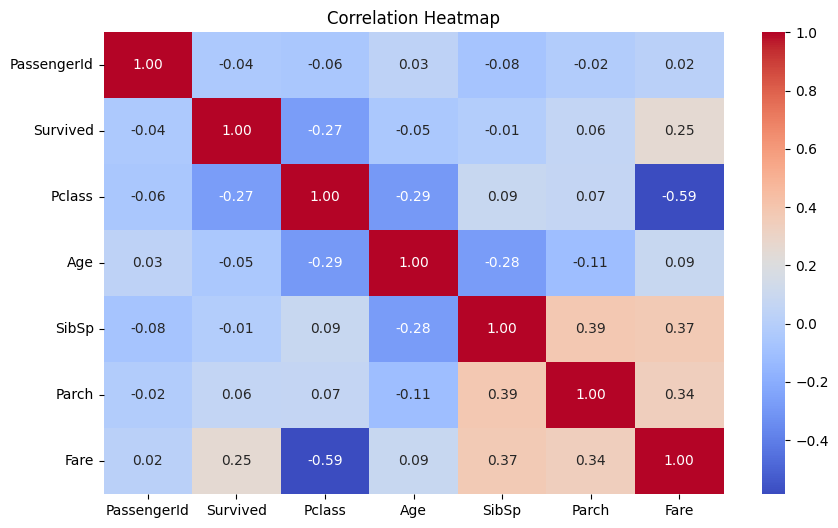

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **5. Prepare Data for Machine Learning**

In [23]:
# Encode categorical variables
train_df["Sex"] = LabelEncoder().fit_transform(train_df["Sex"])  # Male=1, Female=0
train_df["Embarked"] = LabelEncoder().fit_transform(train_df["Embarked"])  # C, Q, S → 0, 1, 2

# Select features and target variable
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_df[features]
y = train_df["Survived"]

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **6. Train and Apply Logistic Regression Model**

In [24]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


# **7. Evaluate the Model**

Model Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        94
           1       0.73      0.73      0.73        48

    accuracy                           0.82       142
   macro avg       0.80      0.80      0.80       142
weighted avg       0.82      0.82      0.82       142



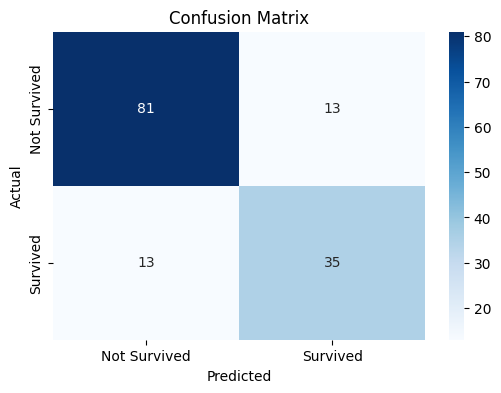

In [25]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **Summary of Findings and Observations:**

# **Objective:**

To explore and analyze the Titanic dataset to uncover patterns, trends, and insights about passengers that might influence survival rates.

# **Key Findings:**
**Survival Rates:**

**Overall Survival Rate:** Approximately 38% of passengers survived the Titanic disaster.

**Gender Impact:** Women had a significantly higher survival rate (74%) compared to men (18%).

**Class Impact:**  First-class passengers had the highest survival rate (62%), followed by second-class (47%) and third-class (24%).

**Age Impact:** Children (under 10) had a much higher survival rate (~55%) compared to adults.

# **Correlations and Trends:**

**Age and Survival:** Younger passengers had higher survival rates, suggesting that children and infants had priority during lifeboat boarding.

**Fare and Class:** Passengers in higher classes paid significantly higher fares, and they had better survival chances.

Embarked Location: **bold text** Passengers who boarded from Cherbourg (C) had the highest survival rate (55%), while those boarding from Southampton (S) had the lowest (33%).

**Missing Data:**

Age has a large number of missing values (~20% of records), which could affect analysis.

Embarked also has missing values, but it's a relatively smaller proportion.

**Outliers and Anomalies:**

Some extreme values for the Fare feature, but these could be valid data points representing wealthy passengers or special circumstances.

# **Implications:**

**Gender and Class:** The data supports the hypothesis that survival rates were influenced by both gender and class, with women and children prioritized during evacuation. This suggests that social status and gender were important survival factors.

**Missing Data:** Imputation methods or removing missing values for age and embarked locations will be needed to proceed with modeling.

**Outlier Handling:** Outliers in fare data might require further investigation to ensure they don’t disproportionately influence modeling outcomes.

# **Conclusion:**
The Titanic dataset shows clear relationships between survival rates and several features like gender, class, age, and embarkation point. These insights could be crucial for predicting survival in future models.

**Data Preprocessing:** Handle missing values, especially for age and embarked.

**Feature Engineering:** Consider creating new features like "Family Size" (SibSp + Parch).

**Modeling:** Use classification algorithms (e.g., logistic regression, decision trees) to predict survival.

This concise summary provides the key insights from an EDA on the Titanic dataset, useful for further analysis and modeling.